### https://www.kaggle.com/c/digit-recognizer/overview

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.shape

(42000, 785)

In [7]:
data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10713,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29919,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13392,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40747,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40243,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = data.iloc[:,1:].values
y = data.iloc[:,0:1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8457142857142858

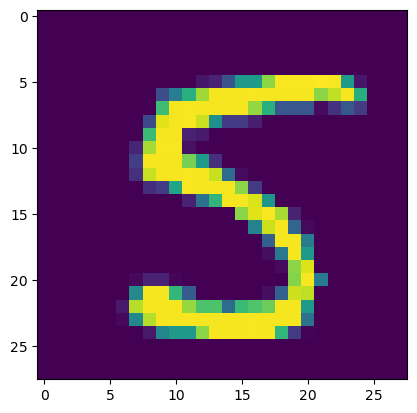

In [15]:
plt.imshow(X_test[100].reshape(28, 28))

In [16]:
clf.predict(X_test[100].reshape(1, 784))

array([5], dtype=int64)

In [17]:
X_test[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  24,  66, 138,
       139, 212, 253, 253, 253, 255, 253, 137,  15,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 109, 162, 21

In [19]:
import bz2file as bz2
import pickle

def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

compressed_pickle('model', clf)